### 1~3 각 개별 jupyter note에서 전처리 후, pickle 또는 csv 저장

1. 전국일방통행도로표준데이터
    - 시도명, 지정사유, 지정연도, 도로폭, 도로차로수, 보차분리여부

2. 전국어린이보호구역표준데이터: 시도명 작업필요
    - 시설 종류, 관할경찰서명, CCTV설치여부, CCTV설치대수, 제공기관명, 보호구역도로폭

3. 전국노인장애인보호구역표준데이터
    - 시도명, 제한속도, CCTV설치여부, CCTV설치대수, 보호구역도로폭

4. 새로운 jupyter note에서 종합.
    - 시도명, 어린이보호구역 CCTV 설치대수, 노인장애인보호구역 CCTV 설치대수, 일방통행 보차분리 ycount

In [54]:
import numpy as np
import pandas as pd

pd_oneway = pd.read_csv('전국일방통행도로표준데이터_pass1.csv')
pd_child = pd.read_csv('전국어린이보호구역표준데이터_pass1.csv')
pd_elder = pd.read_csv('전국노인장애인보호구역표준데이터_pass1.csv')

In [55]:
print(pd_oneway.head()) # 시도명 별 보차분리여부 y count
print(pd_child.head())  # 시도명(지자체명) 별 CCTV 설치대수 count
print(pd_elder.head())

   Unnamed: 0  시도명 지정사유  지정연도  도로폭  도로차로수 보차분리여부
0           0  경기도  불분명   0.0  5.0    1.0      Y
1           1  경기도  불분명   0.0  5.0    1.0      Y
2           2  경기도  불분명   0.0  9.0    1.0      Y
3           3  경기도  불분명   0.0  4.0    1.0      Y
4           4  경기도  불분명   0.0  4.0    1.0      Y
   Unnamed: 0  시설종류 관할경찰서명 CCTV설치여부  CCTV설치대수     제공기관명   보호구역도로폭   시도명
0           0   유치원  고창경찰서        Y       1.0  전라북도 고창군  10.94575  전라북도
1           1  초등학교  고창경찰서        Y       2.0  전라북도 고창군  10.94575  전라북도
2           2   유치원  고창경찰서        Y       1.0  전라북도 고창군  10.94575  전라북도
3           3  초등학교  고창경찰서        Y       2.0  전라북도 고창군  10.94575  전라북도
4           4   유치원  고창경찰서        Y       1.0  전라북도 고창군  10.94575  전라북도
   Unnamed: 0    시도명  제한속도 CCTV설치여부  CCTV설치대수  보호구역도로폭
0           0  서울특별시    30        Y       1.0      3.0
1           1   경상북도    30        N       0.0      6.0
2           2   경상북도    30        N       0.0      6.0
3           3   경상북도    30        N       0.0      7.0

In [56]:
g1 = pd_oneway.groupby('시도명')
s1 = g1['도로차로수'].sum()
s1.name = '일방통행보차분리Y_COUNT'
print(s1)

시도명
강원도         67.0
경기도        401.0
경상남도       153.0
경상북도       347.0
광주광역시       53.0
서울특별시      757.0
인천광역시       45.0
전라남도       113.0
전라북도        34.0
제주특별자치도     55.0
충청남도       122.0
충청북도        44.0
Name: 일방통행보차분리Y_COUNT, dtype: float64


In [57]:
g2 = pd_child.groupby('시도명')
s2 = g2['CCTV설치대수'].sum()
s2.name = '어린이CCTV_COUNT'
print(s2)

시도명
강원도        1327.0
경기도        6834.0
경상남도       3721.0
경상북도       2136.0
광주광역시       419.0
대구광역시      1168.0
대전광역시      1405.0
부산광역시      1493.0
서울특별시      3703.0
세종특별자치시      26.0
울산광역시       812.0
인천광역시       761.0
전라남도       2437.0
전라북도       1895.0
제주특별자치도     484.0
충청남도       1484.0
충청북도       1784.0
Name: 어린이CCTV_COUNT, dtype: float64


In [58]:
g3 = pd_elder.groupby('시도명')
s3 = g3['CCTV설치대수'].sum()
s3.name = '노인장애인CCTV_COUNT'
print(s3)

시도명
강원도          7.0
경기도        148.0
경상남도        18.0
경상북도        44.0
광주광역시        7.0
대구광역시       17.0
대전광역시       55.0
부산광역시       38.0
서울특별시      121.0
세종특별자치시      0.0
울산광역시        4.0
인천광역시       88.0
전라남도        14.0
전라북도        34.0
제주특별자치도      0.0
충청남도       106.0
충청북도        20.0
Name: 노인장애인CCTV_COUNT, dtype: float64


In [59]:
df_combined = pd.concat((s1, s2, s3), axis = 1)
print(df_combined)

         일방통행보차분리Y_COUNT  어린이CCTV_COUNT  노인장애인CCTV_COUNT
시도명                                                     
강원도                 67.0         1327.0              7.0
경기도                401.0         6834.0            148.0
경상남도               153.0         3721.0             18.0
경상북도               347.0         2136.0             44.0
광주광역시               53.0          419.0              7.0
서울특별시              757.0         3703.0            121.0
인천광역시               45.0          761.0             88.0
전라남도               113.0         2437.0             14.0
전라북도                34.0         1895.0             34.0
제주특별자치도             55.0          484.0              0.0
충청남도               122.0         1484.0            106.0
충청북도                44.0         1784.0             20.0
대구광역시                NaN         1168.0             17.0
대전광역시                NaN         1405.0             55.0
부산광역시                NaN         1493.0             38.0
세종특별자치시              NaN       

In [60]:
print(df_combined.index)
df_combined.index = np.arange(len(df_combined.index))
df_combined.reset_index(inplace = True)

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '서울특별시', '인천광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시',
       '울산광역시'],
      dtype='object', name='시도명')


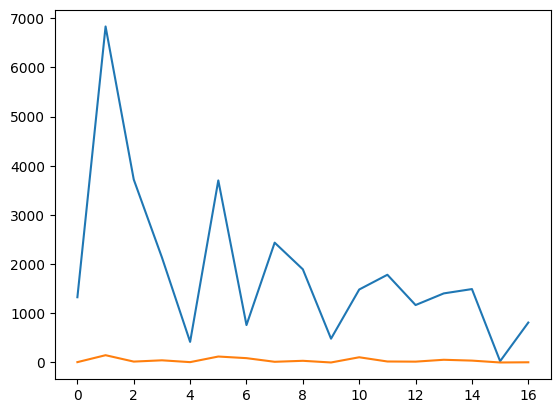

In [61]:
import matplotlib.pyplot as plt

_, axe = plt.subplots()
axe.plot(df_combined['어린이CCTV_COUNT'])
axe.plot(df_combined['노인장애인CCTV_COUNT'])

In [62]:
np.corrcoef(df_combined['어린이CCTV_COUNT'], df_combined['노인장애인CCTV_COUNT'])

array([[1.        , 0.66061138],
       [0.66061138, 1.        ]])

           index  일방통행보차분리Y_COUNT  어린이CCTV_COUNT  노인장애인CCTV_COUNT    어린이norm  \
count  17.000000        12.000000      17.000000        17.000000  17.000000   
mean    8.000000       182.583333    1875.823529        42.411765   0.271713   
std     5.049752       217.573586    1637.415198        45.982414   0.240513   
min     0.000000        34.000000      26.000000         0.000000   0.000000   
25%     4.000000        51.000000     812.000000         7.000000   0.115452   
50%     8.000000        90.000000    1484.000000        20.000000   0.214160   
75%    12.000000       201.500000    2136.000000        55.000000   0.309929   
max    16.000000       757.000000    6834.000000       148.000000   1.000000   

          노인norm  
count  17.000000  
mean    0.286566  
std     0.310692  
min     0.000000  
25%     0.047297  
50%     0.135135  
75%     0.371622  
max     1.000000  


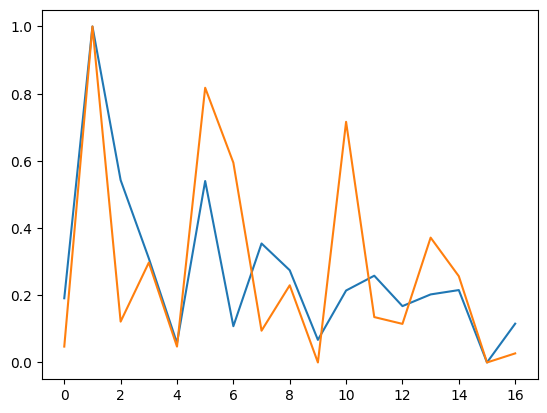

In [63]:
df_combined['어린이CCTV_COUNT'].describe()
jam_min = df_combined['어린이CCTV_COUNT'].min()
jam_max = df_combined['어린이CCTV_COUNT'].max()

df_combined['어린이norm'] = df_combined['어린이CCTV_COUNT'].apply(lambda x: (x - jam_min) / (jam_max - jam_min))

df_combined['노인장애인CCTV_COUNT'].describe()
old_min = df_combined['노인장애인CCTV_COUNT'].min()
old_max = df_combined['노인장애인CCTV_COUNT'].max()

df_combined['노인norm'] = df_combined['노인장애인CCTV_COUNT'].apply(lambda x: (x - old_min) / (old_max - old_min))

print(df_combined.describe())

_, axe = plt.subplots()
axe.plot(df_combined['어린이norm'])
axe.plot(df_combined['노인norm'])

           index  일방통행보차분리Y_COUNT  어린이CCTV_COUNT  노인장애인CCTV_COUNT    어린이norm  \
count  17.000000        12.000000      17.000000        17.000000  17.000000   
mean    8.000000       182.583333    1875.823529        42.411765   0.271713   
std     5.049752       217.573586    1637.415198        45.982414   0.240513   
min     0.000000        34.000000      26.000000         0.000000   0.000000   
25%     4.000000        51.000000     812.000000         7.000000   0.115452   
50%     8.000000        90.000000    1484.000000        20.000000   0.214160   
75%    12.000000       201.500000    2136.000000        55.000000   0.309929   
max    16.000000       757.000000    6834.000000       148.000000   1.000000   

          노인norm        어린이std         노인std  
count  17.000000  1.700000e+01  1.700000e+01  
mean    0.286566  1.959217e-17 -1.959217e-17  
std     0.310692  1.000000e+00  1.000000e+00  
min     0.000000 -1.129722e+00 -9.223475e-01  
25%     0.047297 -6.496969e-01 -7.701154e-01

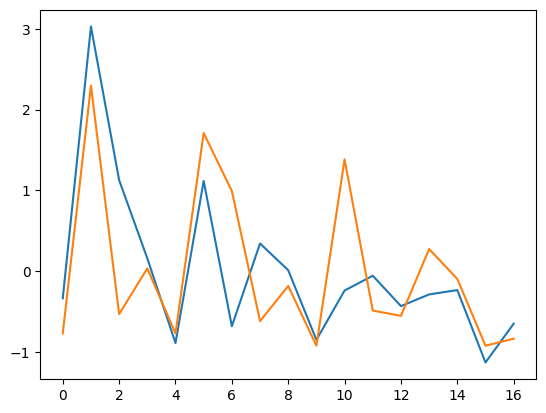

In [64]:
df_combined['어린이CCTV_COUNT'].describe()
jam_mean = df_combined['어린이CCTV_COUNT'].mean()
jam_std = df_combined['어린이CCTV_COUNT'].std()

df_combined['어린이std'] = df_combined['어린이CCTV_COUNT'].apply(lambda x: (x - jam_mean) / jam_std)

df_combined['노인장애인CCTV_COUNT'].describe()
old_mean = df_combined['노인장애인CCTV_COUNT'].mean()
old_std = df_combined['노인장애인CCTV_COUNT'].std()

df_combined['노인std'] = df_combined['노인장애인CCTV_COUNT'].apply(lambda x: (x - old_mean) / old_std)

print(df_combined.describe())

_, axe = plt.subplots()
axe.plot(df_combined['어린이std'])
axe.plot(df_combined['노인std'])

In [78]:
df1 = pd_child[['CCTV설치여부', 'CCTV설치대수', '시도명']]
df2 = pd_elder[['CCTV설치여부', 'CCTV설치대수', '시도명']]
df1.columns = df2.columns
# print(df1.head())
# print(df2.head())
df12 = pd.concat((df1, df2), axis = 0, keys = ['어린이', '노인장애인'])
df12.reset_index(level = 0, inplace = True)
df12

,level_0,CCTV설치여부,CCTV설치대수,시도명
0,어린이,Y,1.0,전라북도
1,어린이,Y,2.0,전라북도
2,어린이,Y,1.0,전라북도
3,어린이,Y,2.0,전라북도
4,어린이,Y,1.0,전라북도
...,...,...,...,...
2513,노인장애인,N,0.0,대구광역시
2514,노인장애인,N,0.0,대구광역시
2515,노인장애인,N,0.0,대구광역시
2516,노인장애인,N,0.0,대구광역시
